## Observations and Insights 

1) The mice sample seleced is evenly distributed by gender with 51% male and 49% female
2) One outlier in the Infubinol test group was found.
3) Capumolin can be infrred to have been effective for mouse 's185' as tumor voume decreased over time with treatment.

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on= 'Mouse ID')

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [85]:
# Checking the number of mice.
mouse_count = mouse_study_df['Mouse ID'].nunique()
mouse_count

249

In [86]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [87]:
# Optional: Get all the data for the duplicate mouse ID. 

dupe_mouse=mouse_study_df.loc[mouse_study_df['Mouse ID'] == 'g989']
dupe_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [88]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] != 'g989']
clean_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [89]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_mouse_study_df['Mouse ID'].nunique()
mouse_count

248

## Summary Statistics

In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = clean_mouse_study_df.groupby(['Drug Regimen'])

drug_mean = drug_group['Tumor Volume (mm3)'].mean()
drug_median = drug_group['Tumor Volume (mm3)'].median()
drug_var = drug_group['Tumor Volume (mm3)'].var()
drug_sd = drug_group['Tumor Volume (mm3)'].std()
drug_sem = drug_group['Tumor Volume (mm3)'].sem()

drug_stats_df = pd.DataFrame({
    "Tumor Volume Mean": drug_mean,
    "Tumor Volume Median": drug_median,
    "Tumor Volume Variance": drug_var,
    "Tumor Volume Standard Deviation": drug_sd,
    "Tumor Volume SEM": drug_sem
})
drug_stats_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_df = drug_group.agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
drug_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Mice')

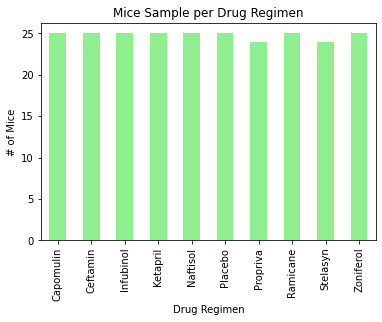

In [92]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_drug = drug_group['Mouse ID'].nunique()
mice_per_drug_chart= mice_per_drug.plot(kind='bar', color='lightgreen')
plt.title('Mice Sample per Drug Regimen')
plt.ylabel('# of Mice')


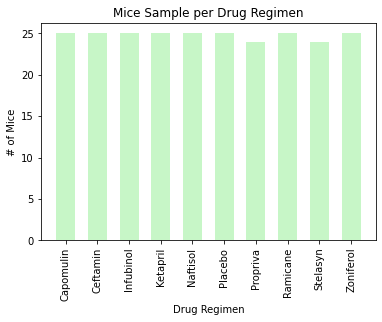

In [93]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(drug_group))
y_axis = drug_group['Mouse ID'].nunique()
tick_locations = [value for value in x_axis]


plt.bar(x_axis, y_axis, alpha=0.5, align="center", color='lightgreen',width=.6)
plt.title("Mice Sample per Drug Regimen")
plt.ylabel('# of Mice')
plt.xlabel('Drug Regimen')
plt.xticks(tick_locations, drug_group['Drug Regimen'].first(), rotation="vertical")

plt.show()

Text(0.5, 1.0, 'Mice Gender Distributon')

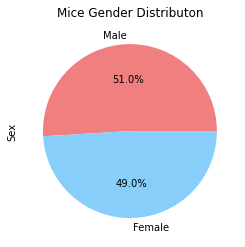

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender=clean_mouse_study_df['Sex'].value_counts()
mice_gender.plot(kind="pie",autopct="%1.1f%%", colors=('lightcoral','lightskyblue'))
plt.title('Mice Gender Distributon')

([<matplotlib.patches.Wedge at 0x257b5baffa0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

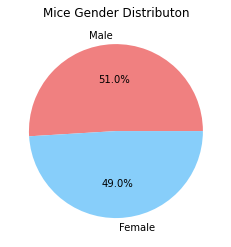

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title('Mice Gender Distributon')
colors = ["lightcoral", "lightskyblue"]
gender=["Male","Female"]
plt.pie(mice_gender, colors=colors,autopct="%1.1f%%", labels=gender)

## Quartiles, Outliers and Boxplots

In [96]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_id_group = clean_mouse_study_df.groupby(['Mouse ID'])
max_time_df = mouse_id_group['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_vol_df = pd.merge(max_time_df, clean_mouse_study_df,on=['Mouse ID','Timepoint'])
last_tumor_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [97]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    tumor_vol_treatment = last_tumor_vol_df.loc[last_tumor_vol_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol_treatment)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_vol_treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of treatments is: {lowerq}")
    print(f"The upper quartile of treatments is: {upperq}")
    print(f"The interquartile range of treatments is: {iqr}")
    print(f"The the median of treatments is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


The lower quartile of treatments is: 32.37735684
The upper quartile of treatments is: 40.1592203
The interquartile range of treatments is: 7.781863460000004
The the median of treatments is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of treatments is: 31.56046955
The upper quartile of treatments is: 40.65900627
The interquartile range of treatments is: 9.098536719999998
The the median of treatments is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of treatments is: 54.04860769
The upper quartile of treatments is: 65.52574285
The interquartile range of treatments is: 11.477135160000003
The the median of treatments is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of treatments is: 48.72207785
The upper quartile of treatments is: 64.299

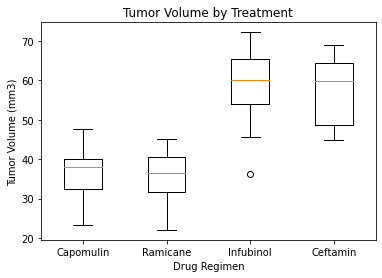

In [98]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Treatment')
ax1.boxplot(tumor_vol_data, labels = treatments)
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

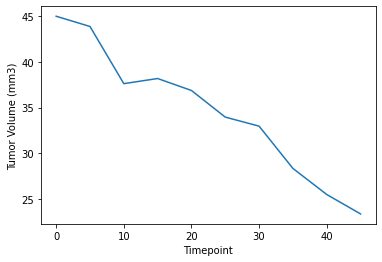

In [102]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_data =clean_mouse_study_df.loc[clean_mouse_study_df['Drug Regimen']== 'Capomulin']
Capomulin_data

Capomulin_mouse_data =Capomulin_data.loc[Capomulin_data['Mouse ID']== 's185']
Capomulin_mouse_data

x_axis = Capomulin_mouse_data['Timepoint']
y_axis = Capomulin_mouse_data['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

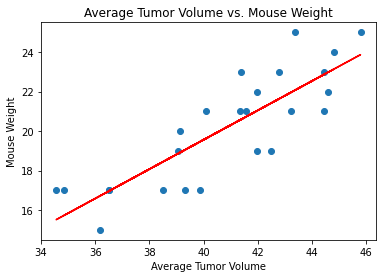

In [106]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_mouse_group = Capomulin_data.groupby(['Mouse ID']).mean()
avg_tumor_vol = Capomulin_mouse_group['Tumor Volume (mm3)']
mouse_weight = Capomulin_mouse_group['Weight (g)']
plt.scatter(avg_tumor_vol, mouse_weight)
plt.plot(avg_tumor_vol,regress_values,"r-")

plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weight")

plt.show

## Correlation and Regression

In [105]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_tumor_vol,mouse_weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")



The correlation between both factors is 0.84
